In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/clean_data.csv')

df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month,inpatient__occupancy,percent_of_inpatients_with_covid
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,1.0,2,0.461779,0.004861
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,0.0,2,0.461779,0.004861
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,0.0,2,0.461779,0.004861
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,0.0,2,0.461779,0.004861


# Are more men dying from COVID-19 than women ?

In [3]:
clean_data_df = df

# Calculate the distribution of female versus male COVID-19 Cases
total_cases= len(clean_data_df['sex'])

by_gender_count=clean_data_df["sex"].value_counts()

by_gender_pct = (100*(by_gender_count/total_cases)).round(2)

# Calculate the distribution of female versus male deaths by COVID-19
death = clean_data_df[(clean_data_df['death_yn'] == 1.0)]
total_death = len(death['death_yn'])
by_gender_death=death["sex"].value_counts()
by_gender_death_pct = (100*(by_gender_death/total_death)).round(2)


# Calculate the distribution of female versus male deaths with underlying medical condition by COVID-19
death_med_cond = death[(death['medcond_yn'] == 1.0)]
total_death_med_cond = len(death_med_cond['medcond_yn'])
by_gender_death_med_cond = death_med_cond["sex"].value_counts()
by_gender_death_med_cond_pct = (100*(by_gender_death_med_cond/total_death_med_cond)).round(2)

# Assemble the resulting series into a single summary dataframe.
gender_df = pd.DataFrame({"Sex": ["Female", "Male"],
                          "Number of Cases": by_gender_count,
                          "Share of Cases (%)": by_gender_pct,
                          "Number of Deaths":by_gender_death,
                          "Share of Deaths (%)":by_gender_death_pct,
                          "Deaths with underlying condition": by_gender_death_med_cond,
                          "Share of Death with underlying condition (%)":by_gender_death_med_cond_pct })

gender_df

,Sex,Number of Cases,Share of Cases (%),Number of Deaths,Share of Deaths (%),Deaths with underlying condition,Share of Death with underlying condition (%)
0.0,Female,243408,53.18,12396,42.5,11683,42.49
1.0,Male,214323,46.82,16773,57.5,15815,57.51


### COVID-19 Cases and Deaths Disaggregated by Sex

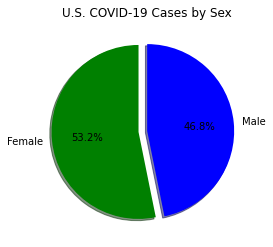

In [4]:
# Pie plot showing the distribution of male versus female COVID-19 Cases

# Create Labels for the sections of the pie
labels = gender_df["Sex"]
distribution = gender_df["Share of Cases (%)"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['green', 'blue'],explode = (0.1, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Cases by Sex")

plt.savefig('Images/US_Covid_cases_by_sex.png')
plt.show()

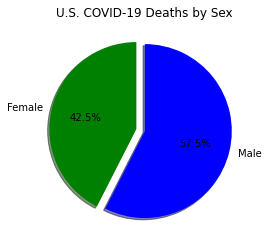

In [5]:
# Pie plot showing the distribution of male versus female deaths by COVID-19 Cases

# Create Labels for the sections of the pie
labels = gender_df["Sex"]
distribution = gender_df["Share of Deaths (%)"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['green', 'blue'],explode = (0.1, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Deaths by Sex")

plt.savefig('Images/US_Covid_deaths_by_sex.png')
plt.show()

### Rate Ratio of COVID-19 by Sex Mortality Rate

In [6]:
total_pct_deaths =(100*(by_gender_death/total_cases)).round(2)


sex_ratio_df = pd.DataFrame({"Sex": ["Female", "Male"],
                          "Number of Cases": by_gender_count,
                          "Number of Deaths":by_gender_death,
                          "Total Deaths (%)":total_pct_deaths})
sex_ratio_df

,Sex,Number of Cases,Number of Deaths,Total Deaths (%)
0.0,Female,243408,12396,2.71
1.0,Male,214323,16773,3.66


In [7]:
male_female_radio = (total_pct_deaths[1]/total_pct_deaths[0]).round(1)
print(f'Men have {male_female_radio} chances of dying compare to women.')
print(f'For every 10 deaths among confirmed cases in women, there are {"{:.0f}".format(10*male_female_radio)} death in men.')

Men have 1.4 chances of dying than women.
For every 10 deaths among confirmed cases in women, there are 14 death in men.


### Possible Risk Factors  

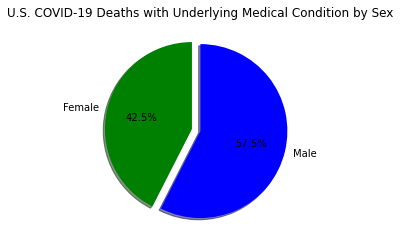

In [8]:
# Pie plot showing the distribution of male versus female deaths by COVID-19 Cases with underlying medical condition

# Create Labels for the sections of the pie
labels = gender_df["Sex"]
distribution = gender_df["Share of Death with underlying condition (%)"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['green', 'blue'],explode = (0.1, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Deaths with Underlying Medical Condition by Sex")

plt.savefig('Images/US_Covid_deaths_with_medcond_by_sex.png')
plt.show()

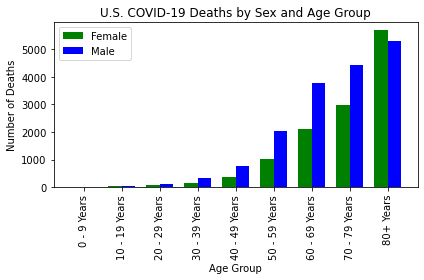

In [9]:
# Calculating the distribution of male versus female deaths by COVID-19 Cases base on age groups

# Number of death in womens by age groups
woman_death = clean_data_df[((clean_data_df['sex'] == 0) & (clean_data_df['death_yn'] == 1.0))]
woman_age_group_deaths = woman_death.groupby(["age_group"]).count()["death_yn"]

# Number of death in male by age group 
men_death = clean_data_df[((clean_data_df['sex'] == 1.0) & (clean_data_df['death_yn'] == 1.0))]
men_age_group_deaths = men_death.groupby(["age_group"]).count()["death_yn"]
men_age_group_deaths

# Bar plot showing the distribution of male versus female deaths by COVID-19 Cases base on age groups

labels = ['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '30 - 39 Years',
        '40 - 49 Years', '50 - 59 Years', '60 - 69 Years', '70 - 79 Years', '80+ Years']
y = woman_age_group_deaths
y1 = men_age_group_deaths

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y, width, label='Female', color='g')
rects2 = ax.bar(x + width/2, y1, width, label='Male', color='b')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Deaths')
ax.set_title('U.S. COVID-19 Deaths by Sex and Age Group')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()
fig.tight_layout()

plt.savefig('Images/US_Covid_deaths_by_sex_and_age.png')
plt.show()

## Are people with underlying health conditions at higher risk of serious symptoms of COVID-19?

In [10]:
clean_data_df = df

# Calculate the distribution of COVID-19 Cases with underlying health conditions.
total_cases= len(clean_data_df['medcond_yn'])
med_cond_count=clean_data_df["medcond_yn"].value_counts()
med_cond_pct = (100*(med_cond_count/total_cases)).round(2)

# Calculate the distribution with underlying health conditions deaths by COVID-19
death = clean_data_df[(clean_data_df['death_yn'] == 1.0)]
total_death = len(death['death_yn'])
med_cond_death=death["medcond_yn"].value_counts()
med_cond_death_share = (100*(med_cond_death/total_death)).round(2)
med_cond_death_pct = (100*(med_cond_death/total_cases)).round(2)

# Calculate the distribution hospitalization with underlying medical conditions by COVID-19
hospitalization = clean_data_df[(clean_data_df['hosp_yn'] == 1.0)]
total_hospitalization = len(hospitalization['hosp_yn'])
med_cond_hospitalization=hospitalization["medcond_yn"].value_counts()
med_cond_hospitalization_share = (100*(med_cond_hospitalization/total_hospitalization)).round(2)
med_cond_hospitalization_pct = (100*(med_cond_hospitalization/total_cases)).round(2)

# Calculate the distribution ICU admission with underlying medical conditions by COVID-19
icu = clean_data_df[(clean_data_df['icu_yn'] == 1.0)]
total_icu = len(icu['icu_yn'])
med_cond_icu=icu["medcond_yn"].value_counts()
med_cond_icu_share = (100*(med_cond_icu/total_icu)).round(2)
med_cond_icu_pct = (100*(med_cond_icu/total_cases)).round(2)

# Assemble the resulting series into a single summary dataframe.
med_cond_df = pd.DataFrame({"Medical Condition": ["Yes", "No"],
                          "Number of Cases": med_cond_count,
                          "Cases (%)": med_cond_pct,
                          "Number of Hospitalizations": med_cond_hospitalization,
                          "Share of Hospitalizations (%)": med_cond_hospitalization_share,
                          "Hospitalizations (%)": med_cond_hospitalization_pct, 
                          "Number of ICU Admissions": med_cond_icu,
                          "Share of ICU Admissions (%)": med_cond_icu_share,
                          "ICU Admissions (%)": med_cond_icu_pct,
                          "Number of Deaths": med_cond_death,
                          "Share of Death (%)": med_cond_death_share,
                          "Death (%)": med_cond_death_pct})
med_cond_df

,Medical Condition,Number of Cases,Cases (%),Number of Hospitalizations,Share of Hospitalizations (%),Hospitalizations (%),Number of ICU Admissions,Share of ICU Admissions (%),ICU Admissions (%),Number of Deaths,Share of Death (%),Death (%)
1.0,Yes,251103,54.86,70545,84.72,15.41,25575,89.06,5.59,27498,94.27,6.01
0.0,No,206628,45.14,12725,15.28,2.78,3140,10.94,0.69,1671,5.73,0.37


### Plots of distribution of COVID-19 Cases by shares with and without underlying health conticions.

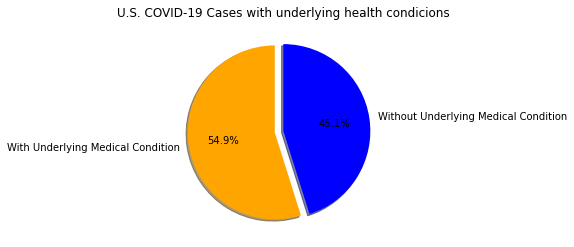

In [11]:
# Pie plot showing the distribution of COVID-19 Cases with and without underlying health conditions

# Create Labels for the sections of the pie
labels = ["With Underlying Medical Condition","Without Underlying Medical Condition" ]
distribution = med_cond_df["Cases (%)"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['orange', 'blue'],explode = (0.1, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Cases with underlying health conditions")

plt.savefig('Images/US_Covid_cases_with_medcond.png')
plt.show()

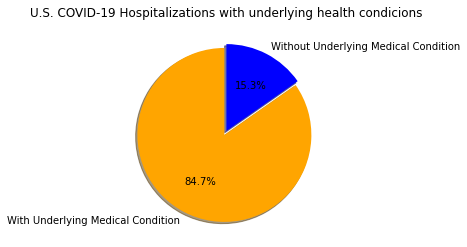

In [12]:
# Pie plot showing the distribution of COVID-19 Hospitalizations with and without underlying health conditions

# Create Labels for the sections of the pie
labels = ["With Underlying Medical Condition","Without Underlying Medical Condition" ]
distribution = med_cond_df["Share of Hospitalizations (%)"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['orange', 'blue'],explode = (0.05, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Hospitalizations with underlying health conditions")

plt.savefig('Images/US_Covid_hospitalizations_with_medcond.png')
plt.show()

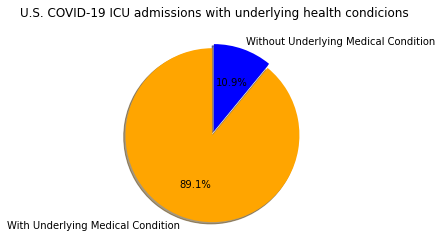

In [13]:
# Pie plot showing the distribution of COVID-19 ICU admissions with and without underlying health conditions

# Create Labels for the sections of the pie
labels = ["With Underlying Medical Condition","Without Underlying Medical Condition" ]
distribution = med_cond_df["Share of ICU Admissions (%)"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['orange', 'blue'],explode = (0.05, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 ICU admissions with underlying health conditions")

plt.savefig('Images/US_Covid_ICU_with_medcond.png')
plt.show()

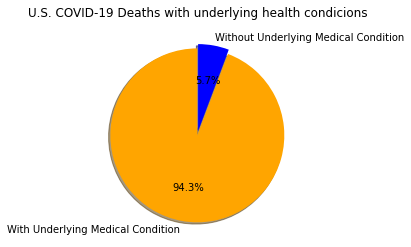

In [14]:
# Pie plot showing the distribution of COVID-19 Deaths with and without underlying health conditions

# Create Labels for the sections of the pie
labels = ["With Underlying Medical Condition","Without Underlying Medical Condition" ]
distribution = med_cond_df["Share of Death (%)"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['orange', 'blue'],explode = (0.05, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Deaths with underlying health conditions")

plt.savefig('Images/US_Covid_deaths_with_medcond.png')
plt.show()

### Bar plot of distribution of COVID-19 Risk with underlying health conditions.

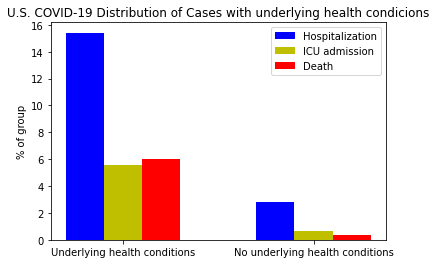

In [15]:
# Bar plot showing the distribution of COVID-19 Cases with underlying health conditions.

labels = ['Underlying health conditions', 'No underlying health conditions']
y1 = med_cond_hospitalization_pct
y2 = med_cond_icu_pct
y3 = med_cond_death_pct

x = np.arange(len(labels))  # the label locations
width = 0.2


fig, ax = plt.subplots()
rects2 = ax.bar(x - width, y1, width, label='Hospitalization', color='b')
rects3 = ax.bar(x , y2, width, label='ICU admission', color='y')
rects4 = ax.bar(x + width, y3, width, label='Death', color='r')
ax.set_ylabel('% of group')
ax.set_title('U.S. COVID-19 Distribution of Cases with underlying health conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='horizontal')
ax.legend()

plt.savefig('Images/US_Covid_distribution_of_cases_with_medcond.png')
plt.show()

###  Risk Rate Ratio of COVID-19 Cases with underlying health condicions.

In [16]:
# Hospitalization risk ratio
hospitalization_radio = (med_cond_hospitalization_pct[1]/med_cond_hospitalization_pct[0]).round(1)
print(f'COVID-19 patients with an underlying medical condition are {hospitalization_radio} times as likely to be hospitalized.')

# ICU admission risk ratio
ICU_radio = (med_cond_icu_pct[1]/med_cond_icu_pct[0]).round(1)
print(f'COVID-19 patients with an underlying medical condition are {ICU_radio} times as likely to be ICU admitted.')

# Death risk ratio
death_radio = (med_cond_death_pct[1]/med_cond_death_pct[0]).round(1)
print(f'COVID-19 patients with an underlying medical condition are {ICU_radio} times as likely to die.')


COVID-19 patients with an underlying medical condition are 5.5 times as likely to be hospitalized.
COVID-19 patients with an underlying medical condition are 8.1 times as likely to be ICU admitted.
COVID-19 patients with an underlying medical condition are 8.1 times as likely to die.


### Conditions contributing to deaths involving coronavirus disease 2019 (COVID-19) in U.S.

In [17]:
# Import the data from Centers for Disease Control and Prevention
med_condition_df = pd.read_csv('http://data.cdc.gov/api/views/hk9y-quqm/rows.csv?accessType=DOWNLOAD')

# Data conditioning
med_condition_df = med_condition_df.replace('COVID-19', 0)
indexNames = med_condition_df[med_condition_df['Condition Group'] == 0 ].index
med_condition_df.drop(indexNames , inplace=True)

# Conditions contributing to deaths involving coronavirus disease 2019 (COVID-19) in U.S. 
med_condition_df

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of Mentions,Flag
0,12/06/2020,02/01/2020,12/05/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,175.0,NaN
1,12/06/2020,02/01/2020,12/05/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,853.0,NaN
2,12/06/2020,02/01/2020,12/05/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2174.0,NaN
3,12/06/2020,02/01/2020,12/05/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,6220.0,NaN
4,12/06/2020,02/01/2020,12/05/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,15295.0,NaN
...,...,...,...,...,...,...,...,...,...,...
12365,12/06/2020,02/01/2020,12/05/2020,PR,All other conditions and causes (residual),All other conditions and causes (residual),"A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F...",65-74,146.0,NaN
12366,12/06/2020,02/01/2020,12/05/2020,PR,All other conditions and causes (residual),All other conditions and causes (residual),"A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F...",75-84,152.0,NaN
12367,12/06/2020,02/01/2020,12/05/2020,PR,All other conditions and causes (residual),All other conditions and causes (residual),"A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F...",85+,113.0,NaN
12368,12/06/2020,02/01/2020,12/05/2020,PR,All other conditions and causes (residual),All other conditions and causes (residual),"A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F...",Not stated,0.0,NaN


In [18]:
# Save clean dataframe
med_condition_df.to_csv('./Data/preexisten_med_conditions_data.csv', index=False)

In [19]:
# Medical Condition data frame
drop_columns = med_condition_df.drop(columns=['Data as of','Start Week', 'End Week','State', 'ICD10_codes', 'Age Group', 'Number of Mentions', 'Flag'])
drop_columns

condition_df = pd.DataFrame(drop_columns.groupby(["Condition Group"]).count())
condition_df.columns = ["Total Count"]
condition_df = condition_df.sort_values(by='Total Count', ascending=False)

# Calculate percentage
condition_df["Condition Percentage (%)"] = (100*(condition_df["Total Count"]/condition_df["Total Count"].sum())).round(2)

condition_df

,Total Count,Condition Percentage (%)
Condition Group,,
Circulatory diseases,3770,31.84
Respiratory diseases,3220,27.20
All other conditions and causes (residual),540,4.56
Alzheimer disease,540,4.56
Diabetes,540,4.56
Malignant neoplasms,540,4.56
Obesity,540,4.56
Renal failure,540,4.56
Sepsis,540,4.56


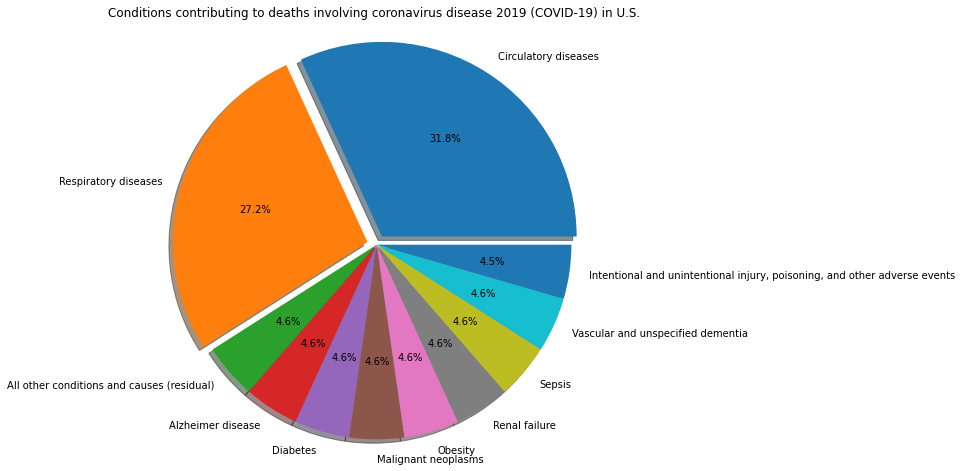

In [20]:
# Pie plot showing conditions contributing to deaths involving coronavirus disease 2019 (COVID-19) in U.S. 

# Create Labels for the sections of the pie
labels = condition_df.index
condition = condition_df['Condition Percentage (%)']
explode = (0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Pie plot using pyplot
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(condition, explode=explode, labels=labels , autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  

#Formatting
plt.title("Conditions contributing to deaths involving coronavirus disease 2019 (COVID-19) in U.S.")

plt.savefig('Images/US_Covid_med_conditions_contributing_death.png')
plt.show()